In [1]:
#se importan librerias

In [2]:
import pandas as pd

In [3]:
#lectura de archivo y asignación de variable para el data frame.
#Se le asigna engine para evitar errores de lectura por formato.
df = pd.read_csv("200511COVID19MEXICO.csv", engine="python") 

In [4]:
#se crea variable de df1 para dataframe de sonora
df1 = df[(df["ENTIDAD_UM"]==26)]

In [5]:
#se localizan las columnas dentro del data frame y se filtran
df1 = df1.loc[:,["FECHA_INGRESO","FECHA_SINTOMAS","FECHA_DEF"]]

In [6]:
#se organizan las columnas del data frame por fecha de defuncion, sintomas y de ingreso.
df1 = df1.sort_values(["FECHA_DEF","FECHA_SINTOMAS","FECHA_INGRESO"])

In [7]:
#exporta tabla del data frame correspondiente a Sonora (df1)
# df1.to_csv("tabla1.csv")
df1

,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF
54867,2020-03-18,2020-03-11,2020-03-18
38049,2020-03-27,2020-03-27,2020-03-29
75296,2020-03-23,2020-03-20,2020-03-30
18958,2020-03-24,2020-03-24,2020-03-30
80028,2020-03-27,2020-03-27,2020-03-31
...,...,...,...
133346,2020-05-10,2020-05-09,9999-99-99
126203,2020-05-11,2020-05-09,9999-99-99
133792,2020-05-11,2020-05-09,9999-99-99
134901,2020-05-11,2020-05-09,9999-99-99


In [8]:
#se seleccionan estados a evaluar y tipo de atención
#se reemplazan valores numericos por hilos acorde a abreviatura del estado
df2 = df[(df["TIPO_PACIENTE"]==2)]
df2 = df2.loc[:,["ENTIDAD_UM"]]
df2["ENTIDAD_UM"] = df2["ENTIDAD_UM"].map({26:"SR", 8:"CH", 19:"NL", 21:"PL"})
df2 = df2["ENTIDAD_UM"].value_counts()

In [9]:
#exporta tabla del data frame correspondiente a numero de casos en estados
# df2.to_csv("tabla2.csv")
df2

PL    1301
NL    1089
CH    1013
SR     549
Name: ENTIDAD_UM, dtype: int64

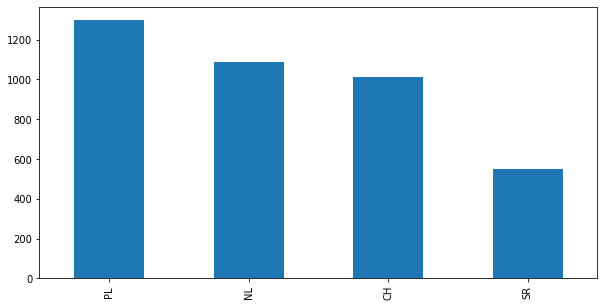

In [10]:
#creación de barra horizontal y .png
g1 = df2.plot.bar(figsize=(10, 5))
#g1.figure.savefig("grafica1.png")

In [ ]:
#Creacion de df3 para grafica 2
df3 = 